after webscraping is the cleaning phase 

In [15]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno

In [16]:


path = '../data/14-8-2022,19:22.csv' # mannuly i put the name of each day 
df = pd.read_csv(path)

In [17]:
df.shape # check the shape usually betweeen 6500- 7100 

(7140, 33)

In [18]:
def toDate(sec): # i have the time in second so to convert to date %yyyy-%mm-%dd
    try:
        a = datetime.datetime.fromtimestamp(sec)
        a = str(a) 
        a = a.split(" ")
        return a 
    except:
        return sec

In [19]:
# df['create_time'] = df['column name'].replace(['1st old value','2nd old  value',...],['1st new value','2nd new value',...])
i = 0 
while i < len(df['create_time']):
    df['create_time'][i] = toDate(df['create_time'][i])
    i+=1

/tmp/ipykernel_302/2196997981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['create_time'][i] = toDate(df['create_time'][i])


In [20]:
i = 0 #refresh too and last update
while i < len(df['refresh']):
    df['refresh'][i] = toDate(df['refresh'][i])
    i+=1

/tmp/ipykernel_302/2385382091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['refresh'][i] = toDate(df['refresh'][i])


In [21]:
i = 0 
while i < len(df['last_update']):
    df['last_update'][i] = toDate(df['last_update'][i])
    i+=1

/tmp/ipykernel_302/1382014819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_update'][i] = toDate(df['last_update'][i])


In [22]:
df['user'][3]

"{'review': 4.23, 'img': '552600943_1536716788404.jpg', 'name': 'مكتب ركن الغدير للعقارات', 'phone': 0, 'iam_verified': True, 'rega_id': None, '__typename': 'ListingUser'}"

In [23]:
a = df['user'][242]
res = ast.literal_eval(a)
res.get('name') #check how to play with dic inside a dateframe

'ابومحمد'

In [24]:
df['review'] = 0
df['profileImg'] = 0
df['UserName'] = 0
df['phone'] = 0
df['iam_verified'] = True
df['rega_id'] = 0 # the coluns user has a dic with 6 keys 

In [25]:
i = 0 #will create the column called review that will have the user review 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['review'][i] = res.get('review')
    i+=1

/tmp/ipykernel_302/2489357915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i] = res.get('review')


In [26]:
df["review"].isna().sum()

405

In [27]:
i = 0  #extra columns 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['review'][i] = res.get('review')
    i+=1

In [28]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['profileImg'][i] = res.get('img')
    i+=1

/tmp/ipykernel_302/2896461739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profileImg'][i] = res.get('img')


In [29]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['UserName'][i] = res.get('name')
    i+=1

/tmp/ipykernel_302/1460742994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UserName'][i] = res.get('name')


In [30]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['iam_verified'][i] = res.get('iam_verified')
    i+=1

/tmp/ipykernel_302/3738396795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['iam_verified'][i] = res.get('iam_verified')


In [31]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['phone'][i] = res.get('phone')
    i+=1

/tmp/ipykernel_302/184754266.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phone'][i] = res.get('phone')


In [32]:
df.columns

Index(['user_id', 'id', 'uri', 'title', 'price', 'content', 'imgs', 'refresh',
       'category', 'beds', 'livings', 'wc', 'area', 'type', 'street_width',
       'age', 'last_update', 'street_direction', 'ketchen', 'ac', 'furnished',
       'location', 'path', 'user', 'native', 'rent_period', 'city', 'district',
       'width', 'length', 'advertiser_type', 'create_time', '__typename',
       'review', 'profileImg', 'UserName', 'phone', 'iam_verified', 'rega_id'],
      dtype='object')

In [33]:
df['review'].value_counts()

5.00    461
4.40    302
4.35    216
4.36    207
4.00    181
       ... 
3.14      1
3.30      1
3.43      1
3.20      1
4.98      1
Name: review, Length: 155, dtype: int64

In [34]:
df['phone'].value_counts()

0    7140
Name: phone, dtype: int64

<AxesSubplot:>

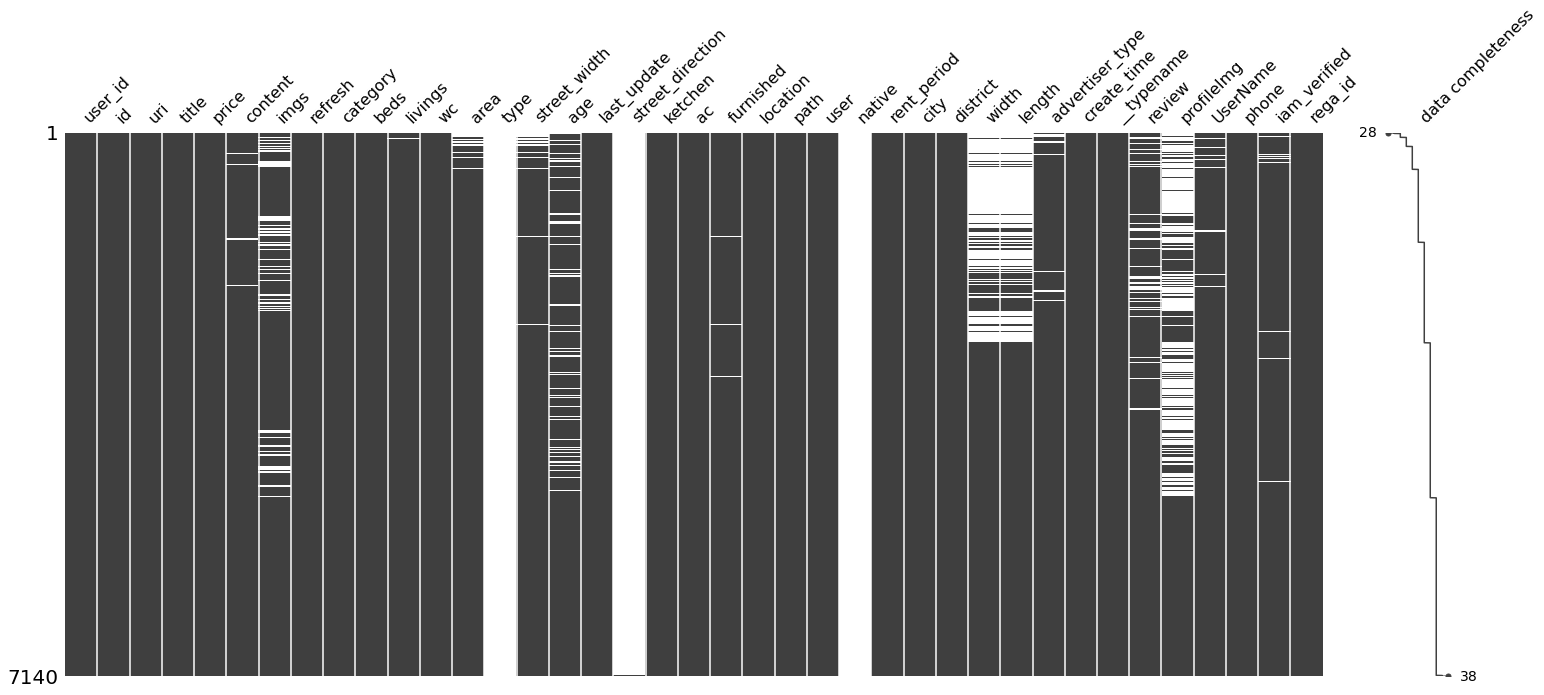

In [35]:
msno.matrix(df, labels=True, filter="bottom", sort="ascending", n=50)

In [36]:
df.shape #number of columns

(7140, 39)

In [37]:
df.iloc[0]

user_id                                                        204540
id                                                            4355600
uri                 شارع-رافع-بن-سالم-حي-اليرموك-الرياض-الرياض-435...
title               شقة للإيجار في شارع رافع بن سالم ، حي اليرموك ...
price                                                           26000
content             شقة للايجار 3 غرف وصالة\n مكونة من :-\nغرفتين ...
imgs                ['002045406_1654817733482.jpg', '002045403_165...
refresh                                        [2022-08-04, 23:51:55]
category                                                            1
beds                                                                3
livings                                                           1.0
wc                                                                  2
area                                                            250.0
type                                                              NaN
street_width        

In [38]:
df['length'].isna().sum()/df['length'].count()

0.3885647607934656

In [39]:
df.columns

Index(['user_id', 'id', 'uri', 'title', 'price', 'content', 'imgs', 'refresh',
       'category', 'beds', 'livings', 'wc', 'area', 'type', 'street_width',
       'age', 'last_update', 'street_direction', 'ketchen', 'ac', 'furnished',
       'location', 'path', 'user', 'native', 'rent_period', 'city', 'district',
       'width', 'length', 'advertiser_type', 'create_time', '__typename',
       'review', 'profileImg', 'UserName', 'phone', 'iam_verified', 'rega_id'],
      dtype='object')

In [40]:
#delete zero-varince columns
df.drop('category' , inplace=True , axis =1) # all has same value 
df.drop('street_direction' , inplace=True , axis =1) # lots of na 
df.drop('native' , inplace=True , axis =1) #all are na
df.drop('rent_period' , inplace=True , axis =1) # all elemnets has same value 
df.drop('city' , inplace=True , axis =1) # all elemnets has same value
df.drop('__typename' , inplace=True , axis =1) #all are na
df.drop('phone' , inplace=True , axis =1) # all elemnets has same value
df.drop('type' , inplace=True , axis =1) # lots of na 
df.drop('uri' , inplace=True , axis =1) # this doesn't add anything title+id 
## length and width has lots of na 50% of the values but i am still not sure also there is the area whitch by itself make scense  

<AxesSubplot:>

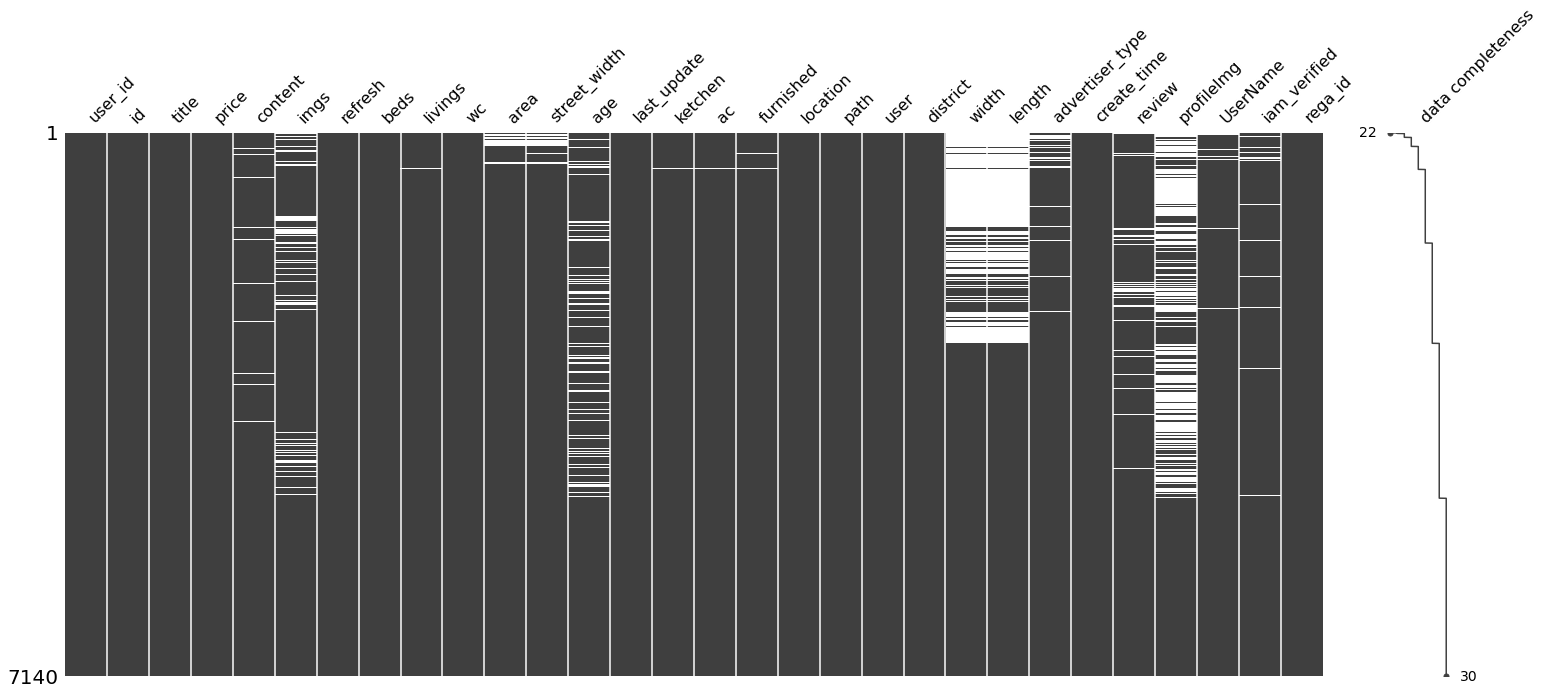

In [41]:
msno.matrix(df, labels=True, filter="bottom", sort="ascending", n=50)

In [42]:
df.age.isna().sum()

732

In [43]:
df.age.value_counts()

0.0     2853
3.0      585
2.0      526
5.0      503
1.0      484
4.0      463
6.0      179
7.0      139
10.0     138
8.0      126
9.0       89
20.0      39
12.0      38
11.0      37
15.0      36
13.0      19
25.0      17
30.0      17
16.0      15
14.0      15
19.0      13
18.0      10
17.0       9
26.0       7
23.0       7
24.0       7
21.0       6
22.0       6
36.0       6
35.0       5
29.0       4
27.0       3
34.0       3
28.0       2
33.0       2
Name: age, dtype: int64

In [44]:
df.to_csv(path , index=False )

after cleaning phase i go to joining all the files